# PREDICCION DE PRECIOS DE AGUACATE EN EEUU





# Enunciado del Problema

- Los datos representan ventas semanales desde 2015 a 2018 a nivel de todos los EEUU. 
- Los datos provienen directamente de las cajas registradoras basados en ventas de aguacate variedad Hass. 
- El precio promedio de los aguacates reflejan el costo por unidad, aún cuando estos se vendan por bolsas. 
- Los códigos (Product Lookup codes ó PLU) en la tabla son solo de aguacates Hass.  No se incluyen otras variedades.

Columnas relevantes en el conjunto de datos:

- Date - la fecha de la observación
- AveragePrice - el precio promedio de una unidad
- type - convencional u orgánico
- year - el año
- Region - la ciudad o región de la observación
- Total Volume - número total de aguacates vendidos
- 4046 - número total de aguacates con PLU 4046 vendidos
- 4225 - número total de aguacates con PLU 4225 vendidos
- 4770 - número total de aguacates con PLU 4770 vendidos



# Importar las librerías

In [65]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import plotly.express as px
%matplotlib inline
from prophet import *

/home/walt/.local/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning:

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html



# Carga de datos

In [2]:
df = pd.read_csv('aguacates_EEUU.csv')

# Explorar el conjunto de datos  

In [3]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [4]:
df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


# Asegurar que estén los datos en orden cronológico

In [14]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
11569,51,2015-01-04,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.00,organic,2015,Southeast
9593,51,2015-01-04,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.00,organic,2015,Chicago
10009,51,2015-01-04,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.00,organic,2015,HarrisburgScranton
1819,51,2015-01-04,1.52,54956.80,3013.04,35456.88,1561.70,14925.18,11264.80,3660.38,0.00,conventional,2015,Pittsburgh
9333,51,2015-01-04,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.00,organic,2015,Boise
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8574,0,2018-03-25,1.36,908202.13,142681.06,463136.28,174975.75,127409.04,103579.41,22467.04,1362.59,conventional,2018,Chicago
9018,0,2018-03-25,0.70,9010588.32,3999735.71,966589.50,30130.82,4014132.29,3398569.92,546409.74,69152.63,conventional,2018,SouthCentral
18141,0,2018-03-25,1.42,163496.70,29253.30,5080.04,0.00,129163.36,109052.26,20111.10,0.00,organic,2018,SouthCentral
17673,0,2018-03-25,1.70,190257.38,29644.09,70982.10,0.00,89631.19,89424.11,207.08,0.00,organic,2018,California


# Realizar una gráfica de precios promedio vrs fecha

¿Cuál es la tendencia a nivel nacional?

In [30]:
px.line(df, x='Date', y='AveragePrice', color='region', height = 500)

In [52]:
mean_price = df[['Date', 'AveragePrice']].groupby('Date')['AveragePrice'].mean()

px.scatter(
    mean_price,
    height = 500,
    trendline='ols'
)

Los precios tienen a incrementar a nivel nacional, como se puede observar en la regresión de la última gráfica donde se agruparon los precios por fecha y se obtuvo el precio promedio a nivel nacional.

# Realizar una gráfica de barras para ver el número de regiones

In [56]:
px.bar(df.groupby('region')['region'].count())

# Realizar una gráfica de barras para ver de qué años se tiene información

In [63]:
px.bar(df.groupby(df.Date.dt.year)['year'].count())

# Preparar los datos para que se acoplen a lo que requiere el modelo a utilizar

In [64]:
df = df[['Date', 'AveragePrice']].rename(columns={'Date': 'ds', 'AveragePrice': 'y'})
df.head()

,ds,y
11569,2015-01-04,1.75
9593,2015-01-04,1.49
10009,2015-01-04,1.68
1819,2015-01-04,1.52
9333,2015-01-04,1.64


# Realizar predicciones

In [69]:
future_dates = model.make_future_dataframe(periods=365, freq='D')
future_dates.tail()

,ds
529,2019-03-21
530,2019-03-22
531,2019-03-23
532,2019-03-24
533,2019-03-25


# Creación y ajuste del modelo

In [67]:
model = Prophet(interval_width = 0.95)
model.fit(df)

22:20:50 - cmdstanpy - INFO - Chain [1] start processing
22:20:53 - cmdstanpy - INFO - Chain [1] done processing


# Pronosticar hacia el futuro un año (365 días)

In [73]:
prediction = model.predict(future_dates)
prediction

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-04,1.493034,0.680536,2.097294,1.493034,1.493034,-0.111538,-0.111538,-0.111538,-0.111538,-0.111538,-0.111538,0.0,0.0,0.0,1.381496
1,2015-01-11,1.488424,0.579790,2.090437,1.488424,1.488424,-0.102819,-0.102819,-0.102819,-0.102819,-0.102819,-0.102819,0.0,0.0,0.0,1.385605
2,2015-01-18,1.483814,0.631215,2.156158,1.483814,1.483814,-0.102546,-0.102546,-0.102546,-0.102546,-0.102546,-0.102546,0.0,0.0,0.0,1.381268
3,2015-01-25,1.479205,0.609637,2.095094,1.479205,1.479205,-0.121775,-0.121775,-0.121775,-0.121775,-0.121775,-0.121775,0.0,0.0,0.0,1.357430
4,2015-02-01,1.474595,0.569141,2.056642,1.474595,1.474595,-0.150418,-0.150418,-0.150418,-0.150418,-0.150418,-0.150418,0.0,0.0,0.0,1.324177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
529,2019-03-21,1.163102,0.280160,1.820165,0.834785,1.423603,-0.085944,-0.085944,-0.085944,-0.085944,-0.085944,-0.085944,0.0,0.0,0.0,1.077157
530,2019-03-22,1.162375,0.293155,1.838395,0.833010,1.424055,-0.084297,-0.084297,-0.084297,-0.084297,-0.084297,-0.084297,0.0,0.0,0.0,1.078078
531,2019-03-23,1.161648,0.229050,1.921351,0.831235,1.424508,-0.082377,-0.082377,-0.082377,-0.082377,-0.082377,-0.082377,0.0,0.0,0.0,1.079271
532,2019-03-24,1.160921,0.317201,1.837460,0.829460,1.424961,-0.080204,-0.080204,-0.080204,-0.080204,-0.080204,-0.080204,0.0,0.0,0.0,1.080717


# Graficar los datos históricos y los del futuro

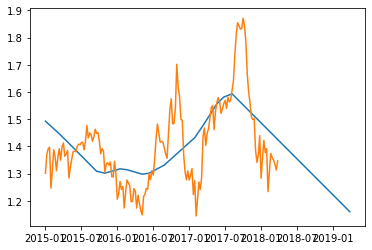

In [83]:
plt.plot(prediction['ds'], prediction['trend'], label = "Prediction")
plt.plot(mean_price.index, mean_price, label = "Historical")

# Graficar los componentes del pronóstico

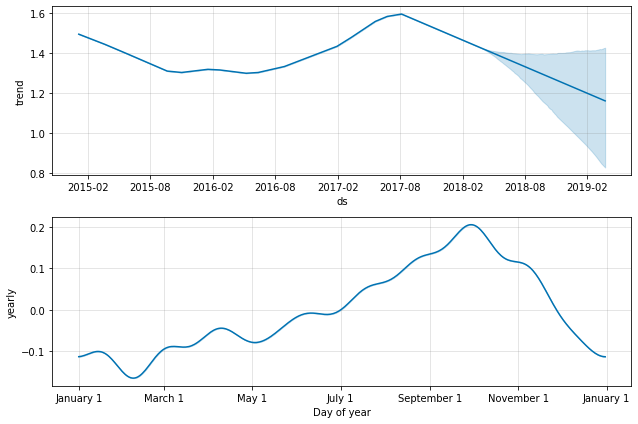

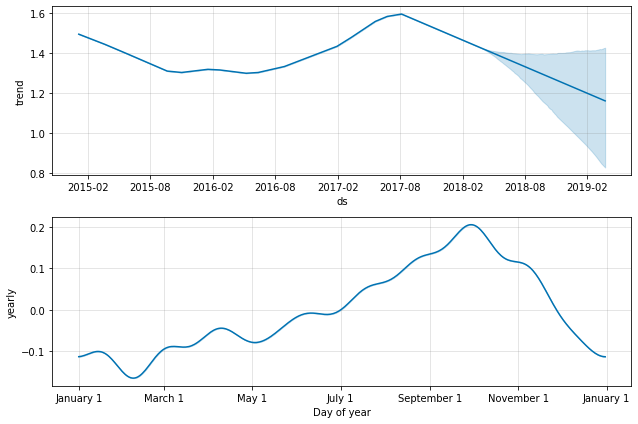

In [79]:
model.plot_components(prediction)

# PARTE 2

### Repetir el ejercicio pero solo con la región oeste "West" de los EEUU

### Leer el archivo de datos

In [85]:
df2 = pd.read_csv('aguacates_EEUU.csv')

In [87]:
df_west = df2[df2['region'] == 'West']
df_west

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
2704,0,2015-12-27,0.83,5291979.63,2038443.68,1717599.45,125254.82,1410681.68,838267.79,567269.76,5144.13,conventional,2015,West
2705,1,2015-12-20,0.88,4737649.03,2017331.24,1314711.00,130849.60,1274757.19,843691.13,417746.45,13319.61,conventional,2015,West
2706,2,2015-12-13,0.85,4899439.92,1798995.46,1596329.01,134101.62,1370013.83,851506.76,517936.19,570.88,conventional,2015,West
2707,3,2015-12-06,0.75,6202513.84,2097720.52,2051392.83,107568.34,1945832.15,1360760.83,582846.33,2224.99,conventional,2015,West
2708,4,2015-11-29,0.99,3719603.21,1461861.54,1216811.00,104219.76,936710.91,688674.00,247318.15,718.76,conventional,2015,West
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18232,7,2018-02-04,1.41,283378.47,22474.66,55360.49,133.41,205409.91,70232.59,134666.91,510.41,organic,2018,West
18233,8,2018-01-28,1.80,185974.53,22918.40,33051.14,93.52,129911.47,77822.23,51986.86,102.38,organic,2018,West
18234,9,2018-01-21,1.83,189317.99,27049.44,33561.32,439.47,128267.76,76091.99,51947.50,228.27,organic,2018,West
18235,10,2018-01-14,1.82,207999.67,33869.12,47435.14,433.52,126261.89,89115.78,37133.99,12.12,organic,2018,West


### Por si acaso no están ordenadas las observaciones

In [88]:
df_west['Date'] = pd.to_datetime(df_west['Date'])
df_west = df_west.sort_values('Date')
df_west

/tmp/ipykernel_34261/2025926572.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
2755,51,2015-01-04,0.89,5794410.58,2275446.87,2582300.65,97024.09,839638.97,688813.01,150819.57,6.39,conventional,2015,West
11881,51,2015-01-04,1.40,187548.30,70313.71,72942.11,24.30,44268.18,10023.72,34244.46,0.00,organic,2015,West
2754,50,2015-01-11,0.95,5333097.71,2203111.92,2292761.26,127412.09,709812.44,598705.08,111073.82,33.54,conventional,2015,West
11880,50,2015-01-11,1.39,223156.55,80139.16,111395.01,63.88,31558.50,9296.76,22261.74,0.00,organic,2015,West
2753,49,2015-01-18,0.96,5475363.01,2431736.63,2258069.63,76348.13,709208.62,527358.78,181809.88,39.96,conventional,2015,West
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18227,2,2018-03-11,1.63,264691.87,27566.25,60383.57,276.42,176465.63,107174.93,69290.70,0.00,organic,2018,West
18226,1,2018-03-18,1.73,210067.47,33437.98,47165.54,110.40,129353.55,73163.12,56020.24,170.19,organic,2018,West
9103,1,2018-03-18,0.99,7254940.65,2099082.66,1707752.84,115997.93,3332107.22,1333247.05,1982086.02,16774.15,conventional,2018,West
9102,0,2018-03-25,0.93,7667064.46,2567279.74,1912986.38,118289.91,3068508.43,1309580.19,1745630.06,13298.18,conventional,2018,West


# Graficar el precio promedio vs fecha

### ¿Es diferente la tendencia comparado a la tendencia nacional?

In [89]:
mean_price_west = df_west[['Date', 'AveragePrice']].groupby('Date')['AveragePrice'].mean()

px.scatter(
    mean_price_west,
    height = 500,
    trendline='ols'
)

La tendencia es la misma respecto a nivel nacional, ambas incrementan.

# Crear el modelo y ajustarlo con los datos

### Preparar los datos para que sean aceptados por el modelo a usar

In [90]:
df_west = df_west[['Date', 'AveragePrice']].rename(columns={'Date': 'ds', 'AveragePrice': 'y'})
df.head()

,ds,y
11569,2015-01-04,1.75
9593,2015-01-04,1.49
10009,2015-01-04,1.68
1819,2015-01-04,1.52
9333,2015-01-04,1.64


In [91]:
model_west = Prophet(interval_width = 0.95)
model_west.fit(df_west)

22:46:53 - cmdstanpy - INFO - Chain [1] start processing
22:46:53 - cmdstanpy - INFO - Chain [1] done processing


# Pronosticar al futuro un año (365 días)

In [92]:
prediction_west = model_west.predict(future_dates)
prediction_west

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-04,1.244731,0.406296,1.749269,1.244731,1.244731,-0.184898,-0.184898,-0.184898,-0.184898,-0.184898,-0.184898,0.0,0.0,0.0,1.059833
1,2015-01-11,1.243888,0.407987,1.702842,1.243888,1.243888,-0.165305,-0.165305,-0.165305,-0.165305,-0.165305,-0.165305,0.0,0.0,0.0,1.078583
2,2015-01-18,1.243045,0.445279,1.744152,1.243045,1.243045,-0.156117,-0.156117,-0.156117,-0.156117,-0.156117,-0.156117,0.0,0.0,0.0,1.086928
3,2015-01-25,1.242202,0.407190,1.714299,1.242202,1.242202,-0.168804,-0.168804,-0.168804,-0.168804,-0.168804,-0.168804,0.0,0.0,0.0,1.073398
4,2015-02-01,1.241359,0.345869,1.660168,1.241359,1.241359,-0.191199,-0.191199,-0.191199,-0.191199,-0.191199,-0.191199,0.0,0.0,0.0,1.050161
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
529,2019-03-21,1.735715,0.898732,2.157570,1.685945,1.786838,-0.204399,-0.204399,-0.204399,-0.204399,-0.204399,-0.204399,0.0,0.0,0.0,1.531316
530,2019-03-22,1.736293,0.883489,2.163404,1.686315,1.787666,-0.199313,-0.199313,-0.199313,-0.199313,-0.199313,-0.199313,0.0,0.0,0.0,1.536980
531,2019-03-23,1.736871,0.904844,2.172929,1.686687,1.788479,-0.193660,-0.193660,-0.193660,-0.193660,-0.193660,-0.193660,0.0,0.0,0.0,1.543211
532,2019-03-24,1.737449,0.926354,2.194147,1.687058,1.789164,-0.187547,-0.187547,-0.187547,-0.187547,-0.187547,-0.187547,0.0,0.0,0.0,1.549902


# Graficar datos históricos y pronosticados

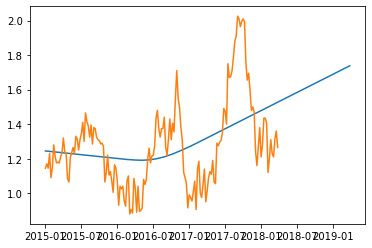

In [93]:
plt.plot(prediction_west['ds'], prediction_west['trend'], label = "Prediction")
plt.plot(mean_price_west.index, mean_price_west, label = "Historical")

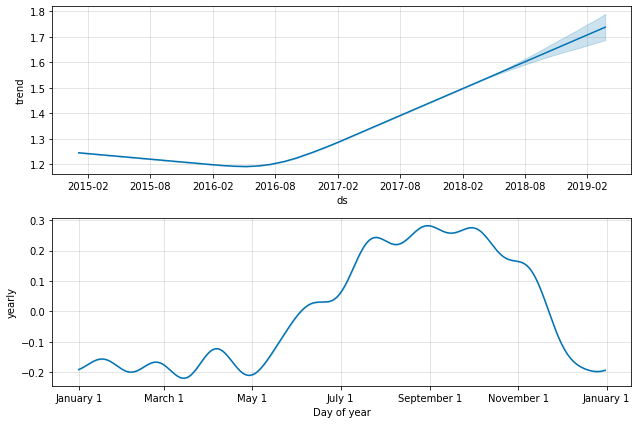

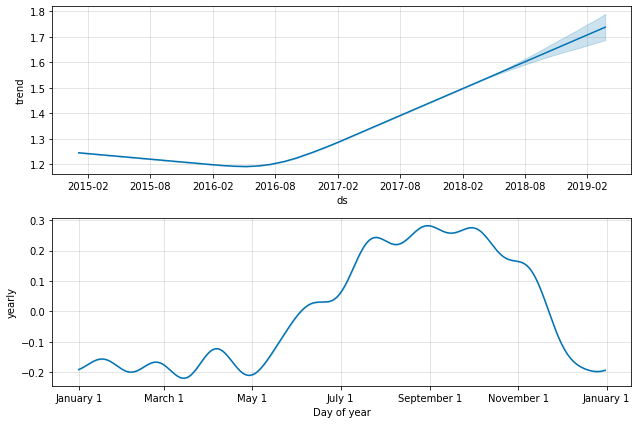

In [94]:
model_west.plot_components(prediction_west)